# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


# Chargement du dataset

In [2]:
df = pd.read_csv('../Données/train.csv')

# Exploration du dataset

In [3]:
print("La taille du jeu de données est de : ", df.shape)

La taille du jeu de données est de :  (8693, 14)


In [4]:
print("Les colonnes du jeu de données sont : ", df.columns)

Les colonnes du jeu de données sont :  Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Distribution : Transported

Transported
True     4378
False    4315
Name: count, dtype: int64


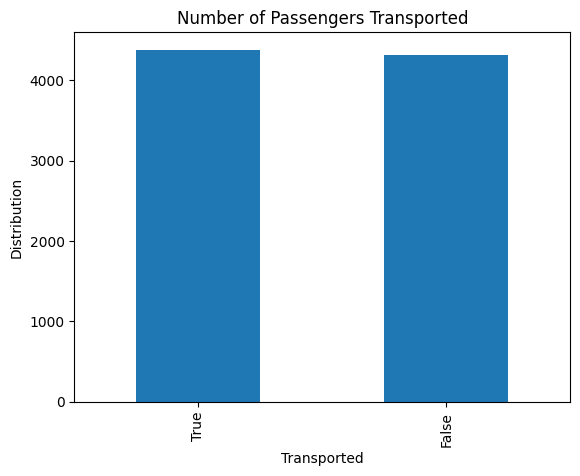

In [8]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")
plt.title("Number of Passengers Transported")
plt.xlabel('Transported')
plt.ylabel('Distribution')

print(df['Transported'].value_counts())

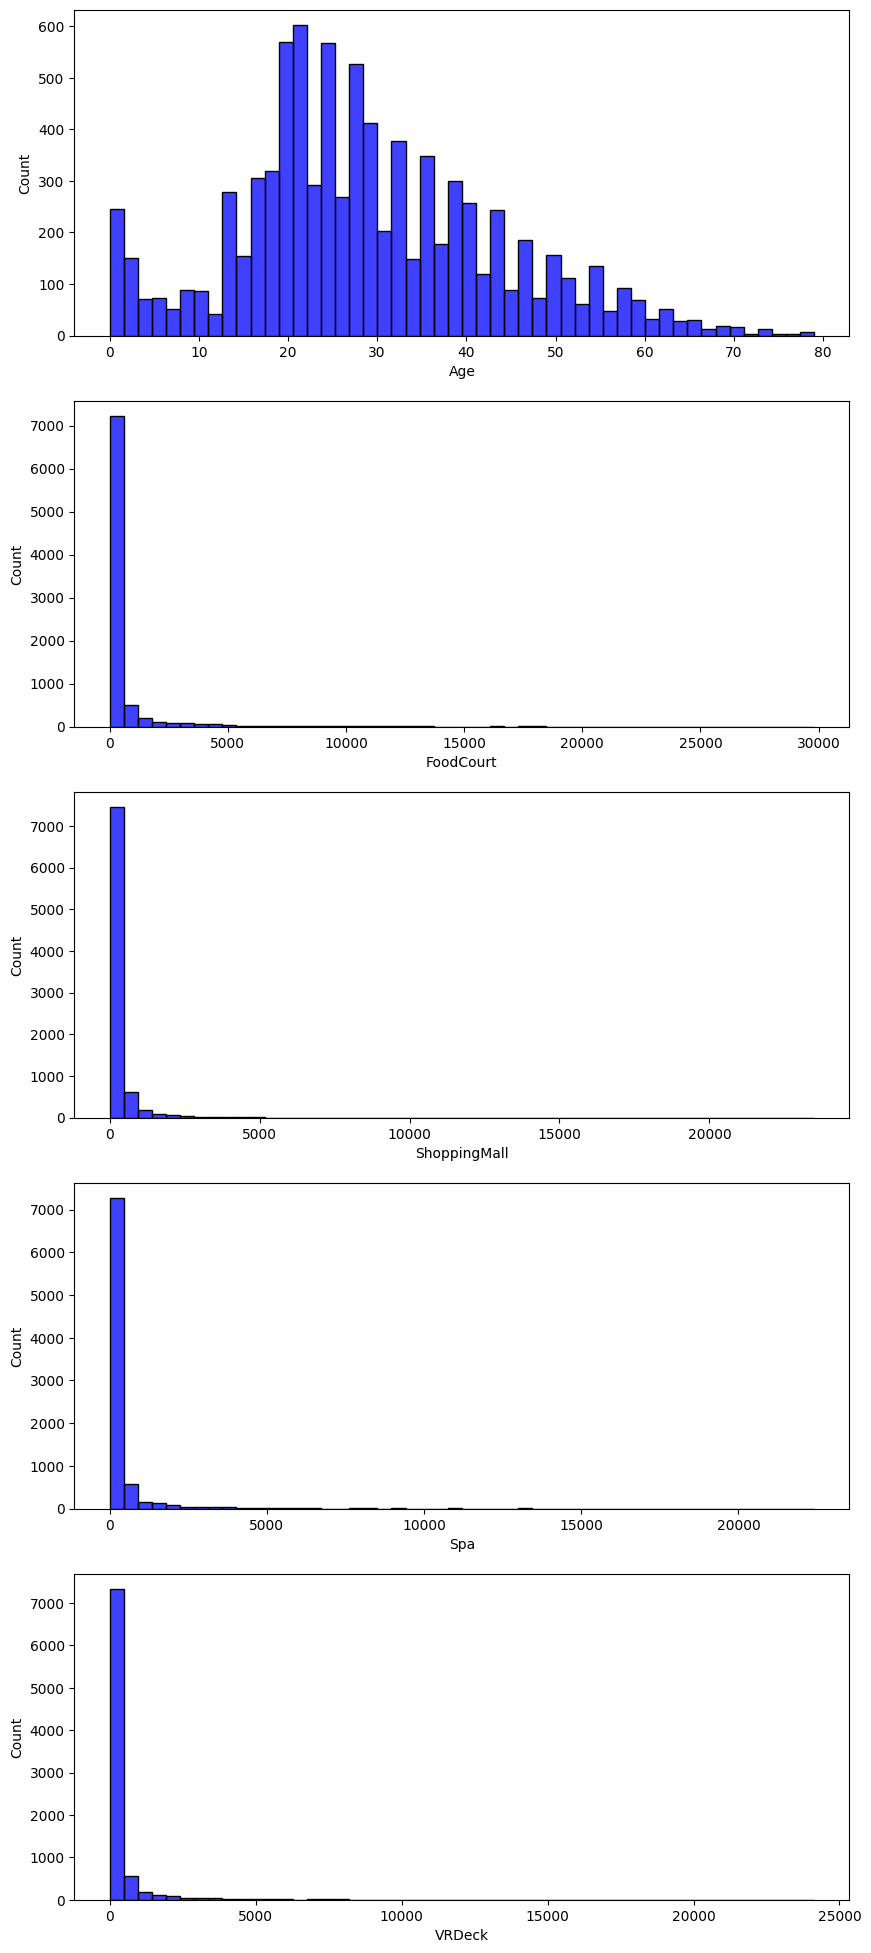

In [9]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

# Preparation des données

In [10]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [11]:
# Gestion de la colonne Cabin
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")


# Conversion en catégories
categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
df[categorical_cols] = df[categorical_cols].astype('category')
df['Cabin_num'] = df['Cabin_num'].astype(float)


# Remplacement des valeurs manquantes dans Cabin_num par la valeur la plus courante
most_frequent_cabin_num = df['Cabin_num'].mode()[0]
df['Cabin_num'] = df['Cabin_num'].fillna(most_frequent_cabin_num)


# Remplacement des valeurs manquantes dans Age par la médiane
df['Age'] = df['Age'].fillna(df['Age'].median())


# Remplacement des valeurs manquantes dans les variables de dépenses par zéro
billed_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in billed_cols:
    df[col] = df[col].fillna(0)


# Remplacer les valeurs manquantes pour les colonnes catégorielles par le mode
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Convertir explicitement les colonnes en catégories après remplissage des valeurs manquantes
df[cat_cols] = df[cat_cols].astype('category')


# Encodage des variables catégorielles
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


C:\Users\User\AppData\Local\Temp\ipykernel_19424\3816887382.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [12]:
df.isnull().sum().sort_values(ascending=False)

Name                         200
PassengerId                    0
HomePlanet_Mars                0
Deck_T                         0
Deck_G                         0
Deck_F                         0
Deck_E                         0
Deck_D                         0
Deck_C                         0
Deck_B                         0
Destination_TRAPPIST-1e        0
Destination_PSO J318.5-22      0
HomePlanet_Europa              0
CryoSleep                      0
Cabin_num                      0
Transported                    0
VRDeck                         0
Spa                            0
ShoppingMall                   0
FoodCourt                      0
RoomService                    0
VIP                            0
Age                            0
Side_S                         0
dtype: int64

# Correlation

In [13]:
print(df['VIP'].isnull().sum())
print(df['VIP'].dtype)
print(df['VIP'].unique())


0
int32
[0 1]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int32  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int32  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Transported                8693 non-null   bool   
 11  Cabin_num                  8693 non-null   float64
 12  HomePlanet_Europa          8693 non-null   bool   
 13  HomePlanet_Mars            8693 non-null   bool 

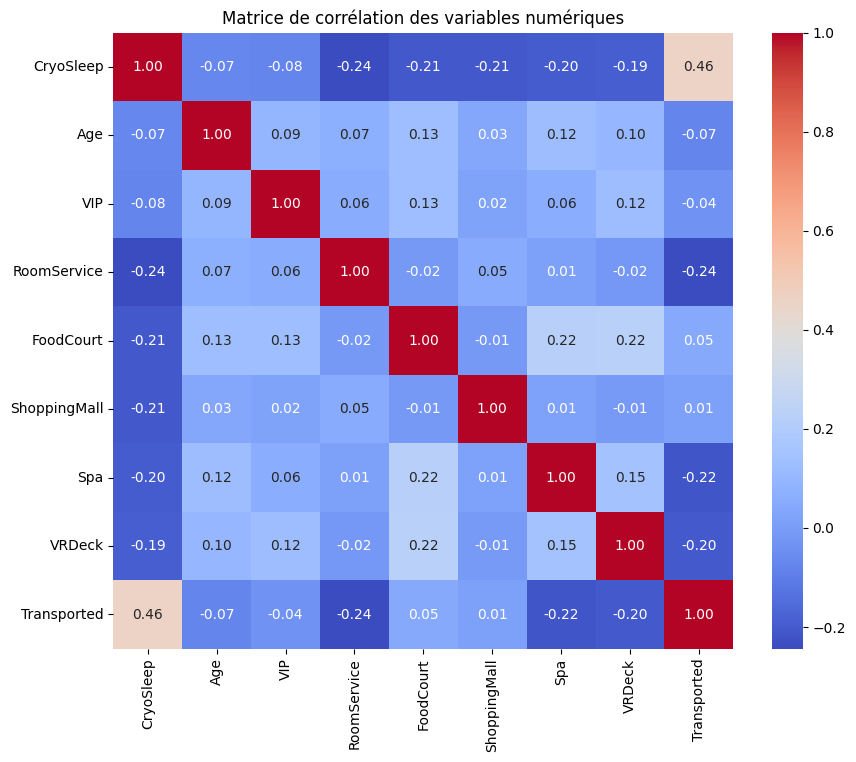

In [19]:
# Convertir la colonne 'Transported' en numérique
df['Transported'] = df['Transported'].astype(int)

# Créer une copie du DataFrame sans la colonne 'Cabin_num'
df_without_cabin_num = df.drop(columns=['Cabin_num'])

# Calcul de la matrice de corrélation pour les variables numériques, y compris 'Transported'
correlation_matrix = df_without_cabin_num.select_dtypes(include=['float64', 'int']).corr()

# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

CryoSleep a des corrélations négatives avec les dépenses (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck). Cela suggère que les passagers en CryoSleep ont tendance à dépenser moins dans ces services, ce qui est logique si on suppose qu'ils sont en hibernation et ne peuvent donc pas utiliser ces services.

Les variables de dépenses (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) montrent des corrélations positives variables entre elles. Par exemple, les dépenses au FoodCourt et au Spa sont modérément corrélées (0.22). Cela peut indiquer que les passagers qui dépensent dans une catégorie sont également susceptibles de dépenser dans une autre.

Age montre des corrélations relativement faibles avec d'autres variables, ce qui indique que l'âge des passagers n'a pas un impact très marqué sur leur comportement de dépense ou sur leur choix d'être en CryoSleep, du moins pas au niveau qui ressort dans ces données.

## Distribution des dépenses en fonction du statut VIP

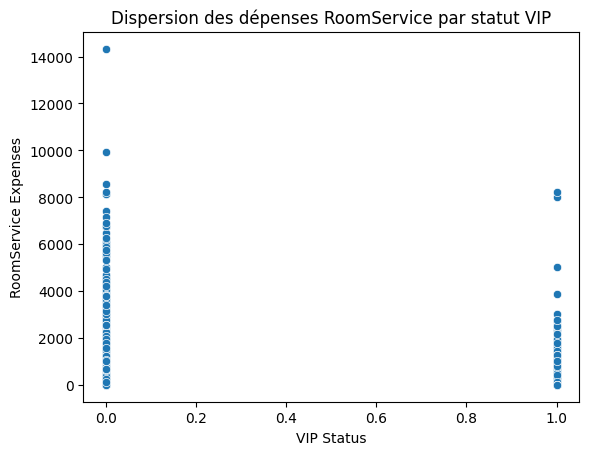

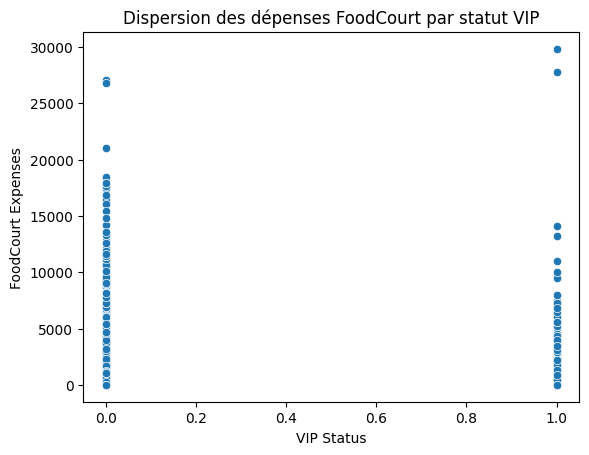

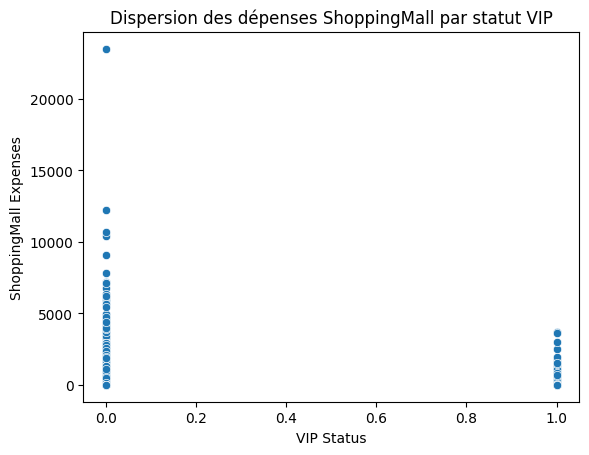

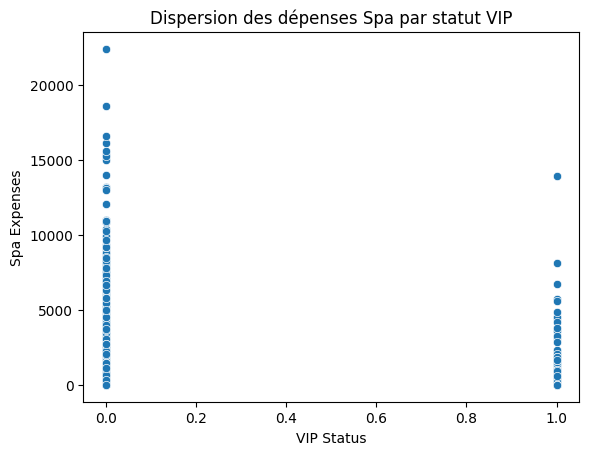

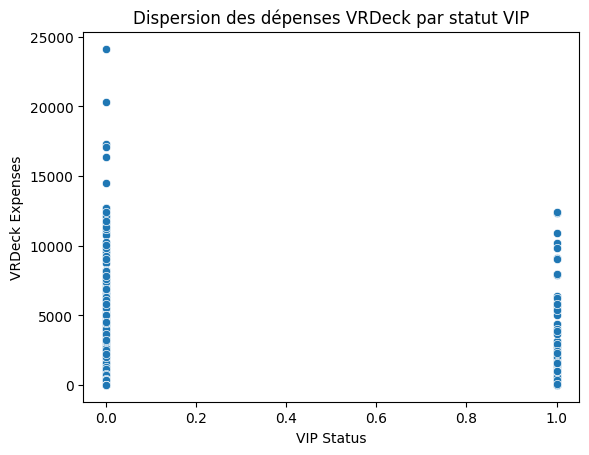

In [15]:
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    sns.scatterplot(x=df['VIP'], y=df[column])
    plt.title(f'Dispersion des dépenses {column} par statut VIP')
    plt.xlabel('VIP Status')
    plt.ylabel(f'{column} Expenses')
    plt.show()

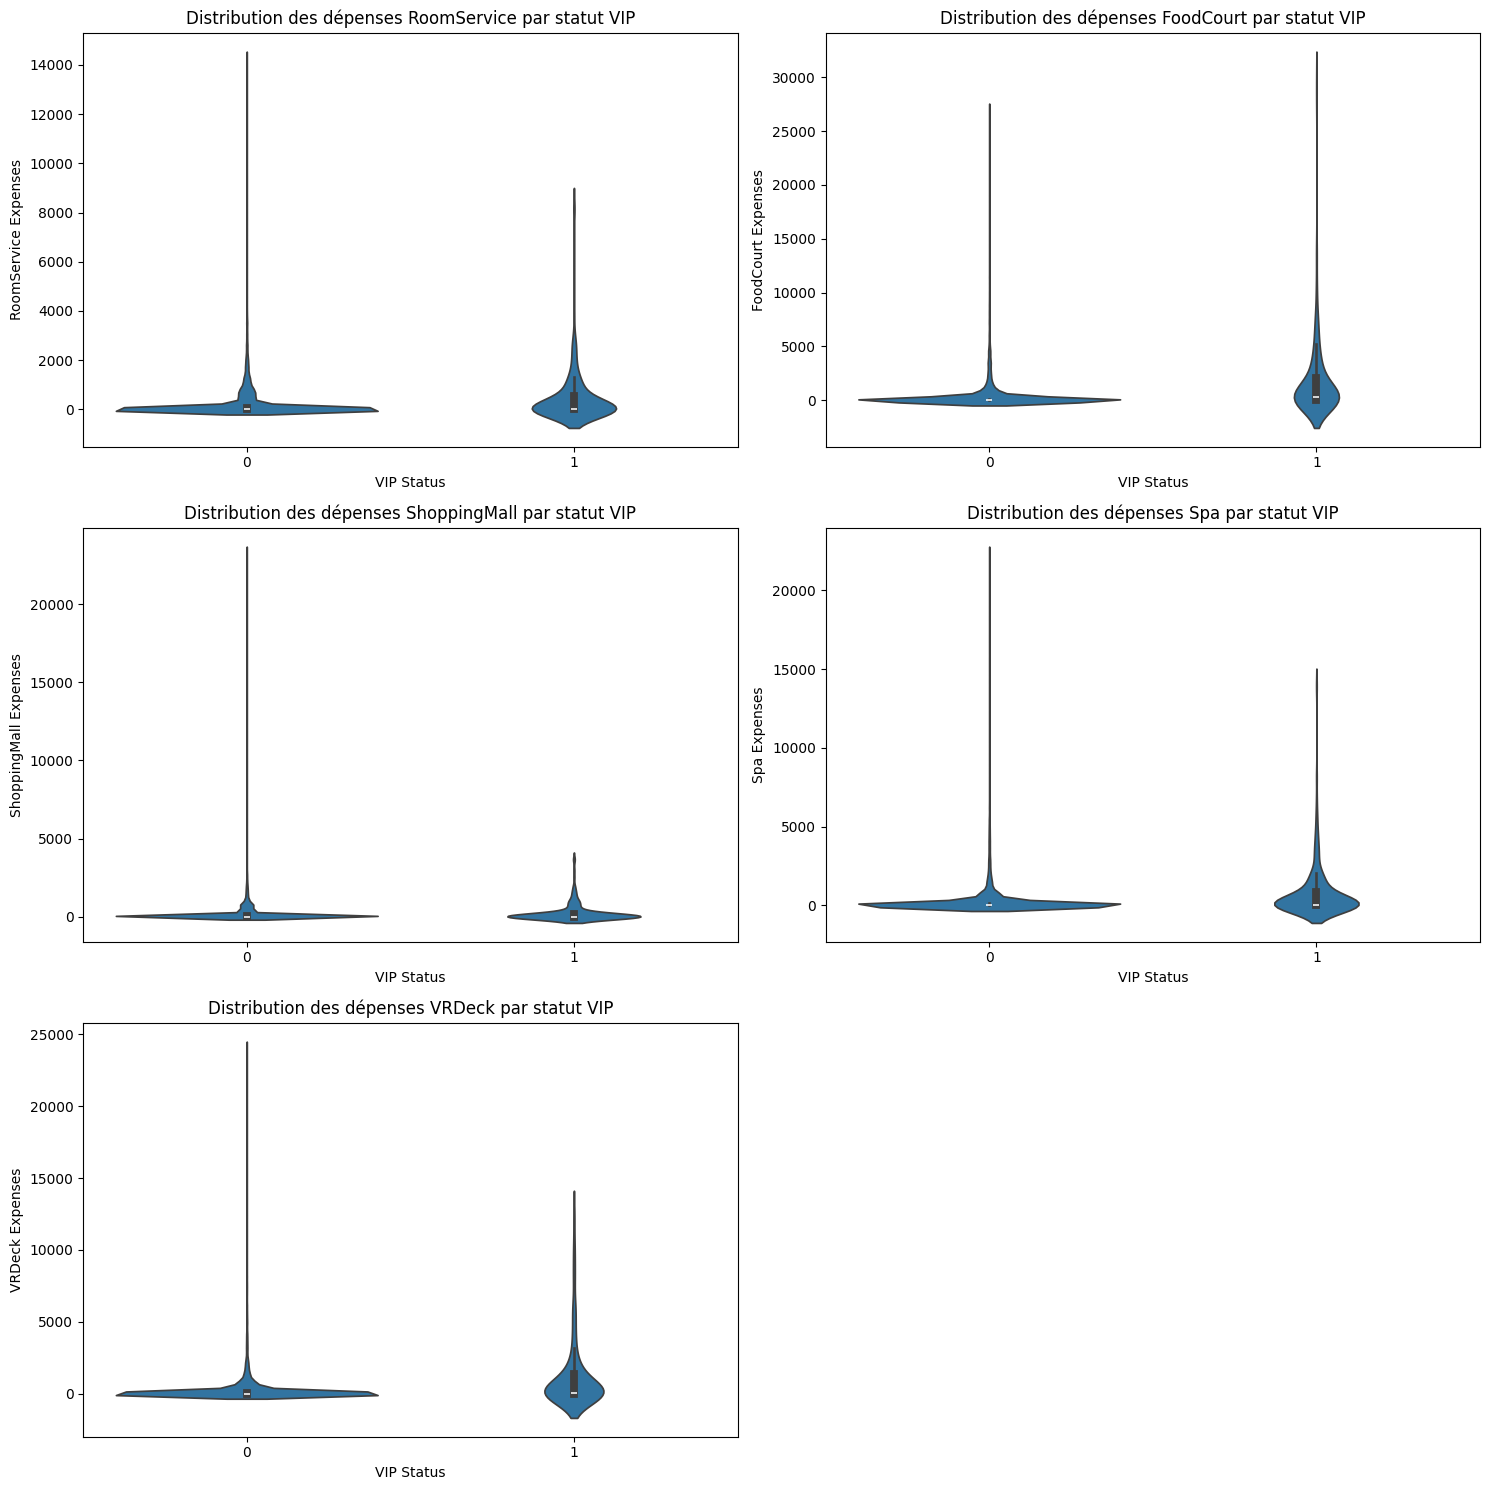

In [16]:
# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Définir les colonnes de dépenses
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Parcourir les colonnes et créer un plot pour chaque type de dépense
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.violinplot(ax=axes[row, col], x=df['VIP'], y=df[column])
    axes[row, col].set_title(f'Distribution des dépenses {column} par statut VIP')
    axes[row, col].set_xlabel('VIP Status')
    axes[row, col].set_ylabel(f'{column} Expenses')

# Supprimer le dernier sous-graphique vide si le nombre de colonnes est impair
if len(columns) % 2 != 0:
    fig.delaxes(axes[2, 1])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

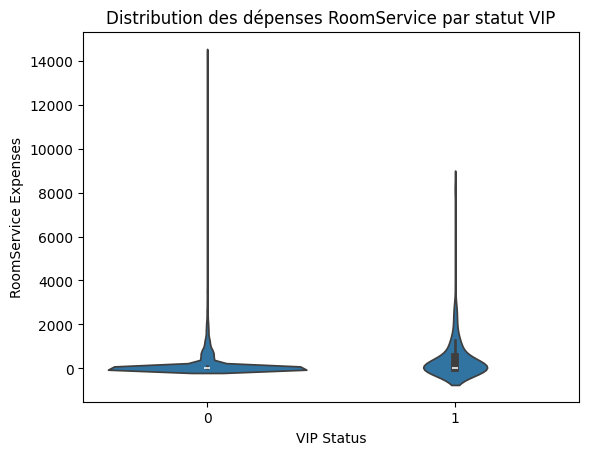

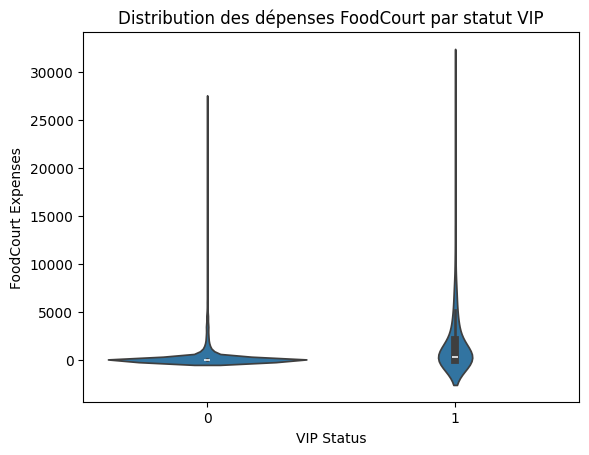

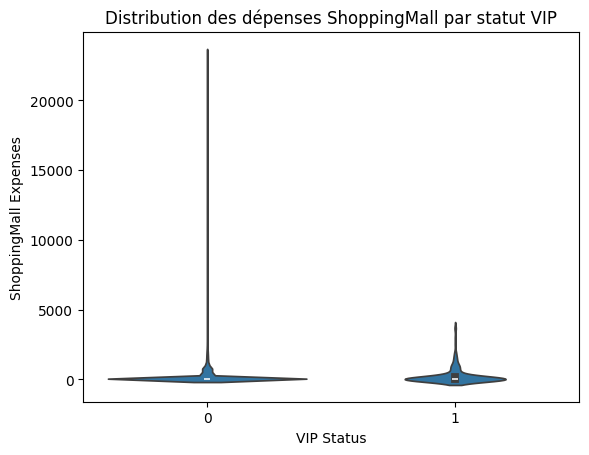

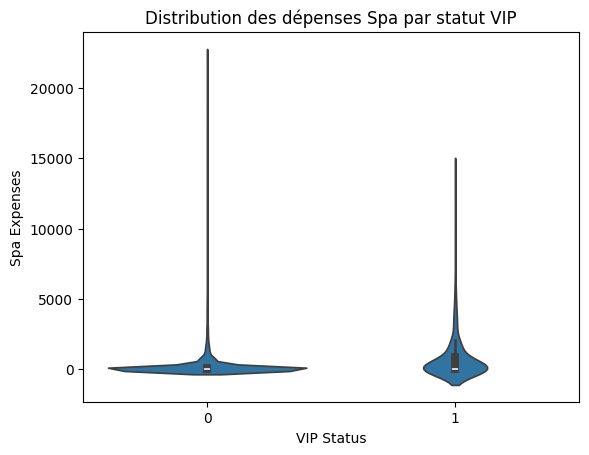

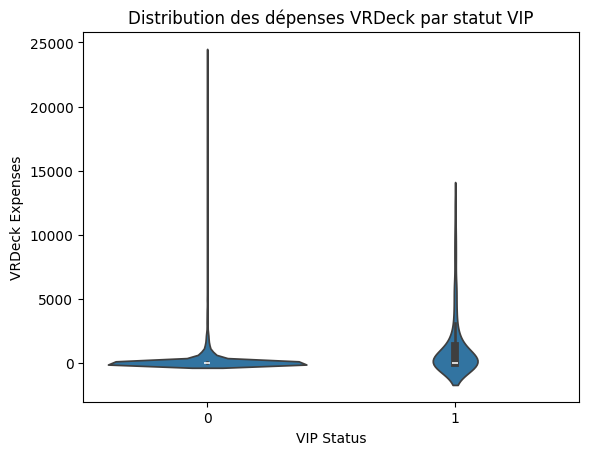

In [16]:
# Pour chaque type de dépense, créer une boîte à moustaches
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    sns.violinplot(x=df['VIP'], y=df[column])
    plt.title(f'Distribution des dépenses {column} par statut VIP')
    plt.xlabel('VIP Status')
    plt.ylabel(f'{column} Expenses')
    plt.show()


In [17]:
# Compter le nombre de VIP et non-VIP
vip_counts = df['VIP'].value_counts()

# Calculer le pourcentage de VIP et non-VIP
vip_percentage = df['VIP'].value_counts(normalize=True) * 100

# Afficher les résultats
print("Nombre de VIP et non-VIP:")
print(vip_counts)
print("\nPourcentage de VIP et non-VIP:")
print(vip_percentage)


Nombre de VIP et non-VIP:
VIP
0    8494
1     199
Name: count, dtype: int64

Pourcentage de VIP et non-VIP:
VIP
0    97.710802
1     2.289198
Name: proportion, dtype: float64


Les dépenses ne varient pas énormément entre les passagers VIP et non-VIP, de plus le nombre de passagers VIP est très faibles. Ces deux points pouraient expliquer la raison des faibles corrélations entre la variables VIP et les variables de dépenses.

# Modélisation


## Régression logistique

In [18]:
# Importer la librairie nécessaire pour la régression logistique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
# 'Transported' est la variable cible, 'PassengerId' et 'Name' sont exclues des variables explicatives
X = df.drop(['Transported', 'PassengerId', 'Name'], axis=1)  # Inclure toutes les autres variables comme explicatives
y = df['Transported']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
epsilon = 1e-15

# Calculer la log-vraisemblance pour un modèle saturé
log_likelihood_saturated = np.sum(y_train * np.log(y_train + epsilon) + (1 - y_train) * np.log(1 - y_train + epsilon))

# Fonction pour calculer la log-vraisemblance
def log_likelihood(y_true, y_pred_proba):
    return np.sum(y_true * np.log(y_pred_proba + epsilon) + (1 - y_true) * np.log(1 - y_pred_proba + epsilon))


### Modèle 0

#### Génération

In [21]:
# Créer une matrice de features pour le modèle nul avec uniquement une constante pour chaque exemple d'entraînement
X_train_null = np.ones((X_train.shape[0], 1))  # Matrice de 1s pour l'entraînement
X_test_null = np.ones((X_test.shape[0], 1))  # Matrice de 1s pour le test


In [22]:
# Créer et entraîner le modèle de régression logistique nul
model_0 = LogisticRegression()
model_0.fit(X_train_null, y_train)

LogisticRegression()

#### Log-vraisemblance

In [23]:
y_pred_proba_0 = model_0.predict_proba(X_test_null)[:, 1]  # Probabilités pour le modèle nul

log_likelihood_0 = log_likelihood(y_test, y_pred_proba_0)

print("Log-vraisemblance du modèle nul:", log_likelihood_0)

Log-vraisemblance du modèle nul: -1205.3085448059626


#### Déviance

In [25]:
# Calculer la déviance pour le modèle nul
deviance_null = -2 * (log_likelihood_saturated - log_likelihood_0)

print("Déviance du modèle nul:", deviance_null)


Déviance du modèle nul: -2410.6170896119406


### Modèle 1 (complet)

#### Génération

In [26]:
# Créer et entraîner le modèle de régression logistique
model_1 = LogisticRegression(max_iter=10000)  # Augmenter max_iter si nécessaire pour la convergence
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Évaluation

##### Log-vraisemblance

In [27]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:, 1]  # Probabilités pour le modèle complet

log_likelihood_1 = log_likelihood(y_test, y_pred_proba_1)

print("Log-vraisemblance du modèle complet:", log_likelihood_1)

Log-vraisemblance du modèle complet: -771.0316591283986


##### Déviance

In [28]:
# Calculer la déviance pour le modèle complet
deviance_full = -2 * (log_likelihood_saturated - log_likelihood_1)

print("Déviance du modèle complet:", deviance_full)

Déviance du modèle complet: -1542.0633182568126


##### Test du rapport de vraisemblance

In [29]:
# Comparaison des déviances pour tester la significativité du modèle complet par rapport au nul
delta_deviance = deviance_null - deviance_full
print("Delta Déviance (modèle nul - modèle complet):", delta_deviance)

#------------------------------------------------------------------------------------------------

# Calculer la statistique G
G = -2 * (log_likelihood_0 - log_likelihood_1)
print("Statistique G:", G)


Delta Déviance (modèle nul - modèle complet): -868.553771355128
Statistique G: 868.553771355128


In [30]:
from scipy.stats import chi2


# Nombre de degrés de liberté : nombre de paramètres dans le modèle complet moins ceux dans le modèle nul
df = len(X_train.columns) - 1  # Assumant que le modèle nul n'a que l'intercept

# Calculer la p-valeur du test du rapport de vraisemblance
p_value = chi2.sf(G, df)
print("P-valeur:", p_value)

# Interprétation du test
if p_value < 0.05:
    print("Le modèle complet est statistiquement significatif par rapport au modèle nul (p < 0.05).")
else:
    print("Il n'y a pas de preuve que le modèle complet améliore de manière significative le modèle nul (p >= 0.05).")

P-valeur: 3.847297405634345e-171
Le modèle complet est statistiquement significatif par rapport au modèle nul (p < 0.05).


##### Table de classification

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score


# Définir un seuil de classification
threshold = 0.5  # Ce seuil peut être ajusté en fonction de l'analyse de la courbe ROC ou d'autres critères

# Convertir les probabilités en prédictions binaires basées sur le seuil
y_pred = (y_pred_proba_1 >= threshold).astype(int)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Calculer le taux de bonne classification
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Taux de bonne classification :", accuracy)

# Calculer la sensibilité
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print("Sensibilité :", sensitivity)

# Calculer la spécificité
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Spécificité :", specificity)


Matrice de confusion :
 [[641 220]
 [156 722]]
Taux de bonne classification : 0.7837837837837838
Sensibilité : 0.8223234624145785
Spécificité : 0.7444831591173054


##### Seuil optimal

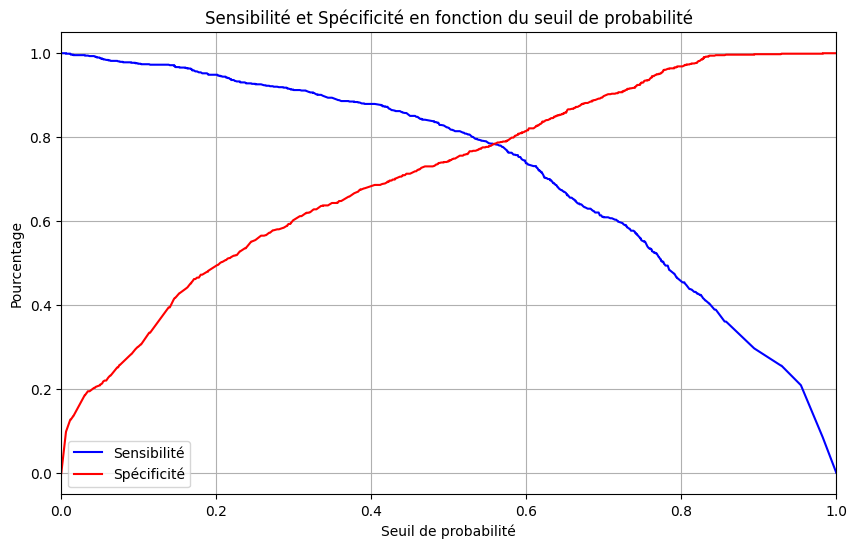

Seuil optimal: 0.5569002783628485


In [32]:
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour les données de test
y_pred_proba = model_1.predict_proba(X_test)[:, 1]

# Calculer les taux pour la courbe ROC et obtenir les seuils
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculer la spécificité à partir du FPR
specificity = 1 - fpr

# Tracer la sensibilité et la spécificité pour différents seuils
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label='Sensibilité', color='blue')
plt.plot(thresholds, specificity, label='Spécificité', color='red')
plt.xlim([0, 1])
plt.title('Sensibilité et Spécificité en fonction du seuil de probabilité')
plt.xlabel('Seuil de probabilité')
plt.ylabel('Pourcentage')
plt.legend()
#plt.gca().invert_xaxis()  # Inverser l'axe des X pour que les seuils décroissent de gauche à droite
plt.grid(True)
plt.show()

# Calculer le seuil où la différence entre la sensibilité et la spécificité est minimale
index_of_min_diff = np.argmin(np.abs(tpr - specificity))
optimal_threshold = thresholds[index_of_min_diff]

print(f"Seuil optimal: {optimal_threshold}")


##### Courbe ROC AUC

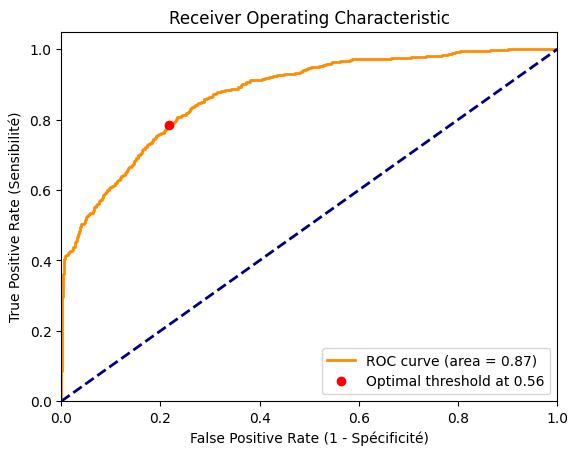

In [33]:
roc_auc = auc(fpr, tpr)  # Calculer l'aire sous la courbe ROC

# Trouver les indices les plus proches du seuil optimal
optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

# Créer le graphique
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(optimal_fpr, optimal_tpr, 'ro', label=f'Optimal threshold at {optimal_threshold:.2f}')  # Ajouter le point optimal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Spécificité)')
plt.ylabel('True Positive Rate (Sensibilité)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

L'aire sous la courbe (AUC) de 0.87, la discrimination est considérée comme excellente.

#### Tests de significativité

##### Test de significativité globale du modèle

In [34]:
from scipy.stats import chi2

# Nombre de degrés de liberté : nombre de paramètres dans le modèle complet moins ceux dans le modèle nul
df = len(X_train.columns) - 1  # Assumant que le modèle nul n'a que l'intercept

# Calculer la p-valeur du test du rapport de vraisemblance
p_value = chi2.sf(G, df)
print("P-valeur:", p_value)

# Interprétation du test
if p_value < 0.05:
    print("Le modèle complet est statistiquement significatif par rapport au modèle nul (p < 0.05).")
else:
    print("Il n'y a pas de preuve que le modèle complet améliore de manière significative le modèle nul (p >= 0.05).")

P-valeur: 3.847297405634345e-171
Le modèle complet est statistiquement significatif par rapport au modèle nul (p < 0.05).


#### Comparaison de modèles à l'aide de critères

In [35]:
# Fonction pour calculer AIC
def calculate_aic(log_likelihood, num_params):
    return -2 * log_likelihood + 2 * num_params

# Fonction pour calculer BIC
def calculate_bic(log_likelihood, num_params, num_samples):
    return -2 * log_likelihood + np.log(num_samples) * num_params

In [36]:
best_model = model_1
best_log_likelihood = log_likelihood_1
best_aic = calculate_aic(log_likelihood_1, len(X_train.columns))
best_bic = calculate_bic(log_likelihood_1, len(X_train.columns), X_train.shape[0])
best_features = X.columns.tolist()

print(f"Modèle complet - AIC: {best_aic}, BIC: {best_bic}")

Modèle complet - AIC: 1584.0633182567972, BIC: 1727.851836820721


In [37]:
# Itération pour éliminer les variables
while True:
    improved = False
    for var in best_features:
        X_train_reduced = X_train[best_features].drop(var, axis=1)
        X_test_reduced = X_test[best_features].drop(var, axis=1)
        
        model_reduced = LogisticRegression(max_iter=10000)
        model_reduced.fit(X_train_reduced, y_train)
        
        y_pred_proba_reduced = model_reduced.predict_proba(X_test_reduced)[:, 1]
        log_likelihood_reduced = np.sum(y_test * np.log(y_pred_proba_reduced) + (1 - y_test) * np.log(1 - y_pred_proba_reduced))
        deviance_reduced = -2 * log_likelihood_reduced
        
        aic_reduced = calculate_aic(log_likelihood_reduced, len(X_train_reduced.columns))
        bic_reduced = calculate_bic(log_likelihood_reduced, len(X_train_reduced.columns), X_train.shape[0])
        
        print(f"Modèle sans {var} - AIC: {aic_reduced}, BIC: {bic_reduced}")
        
        if aic_reduced < best_aic or bic_reduced < best_bic:
            best_model = model_reduced
            best_log_likelihood = log_likelihood_reduced
            best_aic = aic_reduced
            best_bic = bic_reduced
            best_features.remove(var)
            improved = True
            break
    
    if not improved:
        break

print(f"Meilleur modèle - AIC: {best_aic}, BIC: {best_bic}")
print("Variables finales:", best_features)

Modèle sans CryoSleep - AIC: 1645.8289767050228, BIC: 1782.770422956379
Modèle sans Age - AIC: 1589.9364684032178, BIC: 1726.877914654574
Modèle sans CryoSleep - AIC: 1648.093771896024, BIC: 1778.1881458348123
Modèle sans VIP - AIC: 1589.3549604846553, BIC: 1719.4493344234436
Modèle sans CryoSleep - AIC: 1648.8636606858795, BIC: 1772.1109623121001
Modèle sans RoomService - AIC: 1671.38561470866, BIC: 1794.6329163348805
Modèle sans FoodCourt - AIC: 1614.1763740440535, BIC: 1737.423675670274
Modèle sans ShoppingMall - AIC: 1588.9889989193907, BIC: 1712.2363005456114
Modèle sans CryoSleep - AIC: 1642.185598652305, BIC: 1758.5858279659578
Modèle sans RoomService - AIC: 1679.2839518029625, BIC: 1795.6841811166153
Modèle sans FoodCourt - AIC: 1612.8185918625593, BIC: 1729.218821176212
Modèle sans Spa - AIC: 1774.676515580165, BIC: 1891.0767448938177
Modèle sans VRDeck - AIC: 1770.6395481581944, BIC: 1887.0397774718472
Modèle sans Cabin_num - AIC: 1591.2437137993825, BIC: 1707.6439431130352
M

AUC de la courbe ROC: 0.8622370554977923


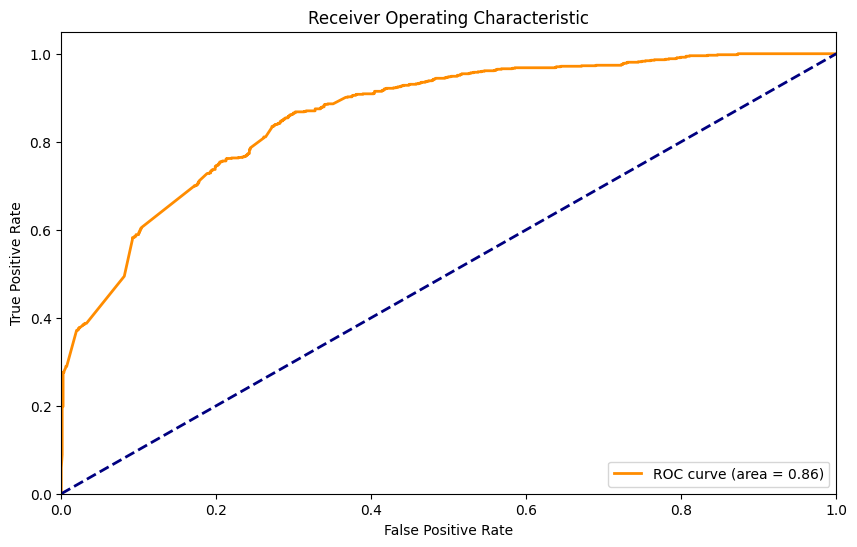

In [38]:
# Vérifier que les colonnes de X_test correspondent aux colonnes utilisées pour entraîner le modèle réduit
X_test_reduced = X_test[best_features]

# Prédire les probabilités pour les données de test
y_pred_proba_best = best_model.predict_proba(X_test_reduced)[:, 1]

# Calculer les taux pour la courbe ROC et obtenir les seuils
best_fpr, best_tpr, best_thresholds = roc_curve(y_test, y_pred_proba_best)

# Calculer l'aire sous la courbe ROC
roc_auc = auc(best_fpr, best_tpr)
print("AUC de la courbe ROC:", roc_auc)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(best_fpr, best_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Métriques

In [60]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

# Définir un seuil de classification basé sur le seuil optimal trouvé précédemment
threshold_final = 0.5569002783628485  # Utilisez le seuil optimal que vous avez trouvé

# Convertir les probabilités en prédictions binaires basées sur le seuil optimal
y_pred_final = (y_pred_proba_best >= threshold_final).astype(int)

# Créer la matrice de confusion
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
print("Matrice de confusion :\n", conf_matrix_final)

# Calculer le taux de bonne classification (accuracy)
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Taux de bonne classification :", accuracy_final)

# Calculer la précision
precision_final = precision_score(y_test, y_pred_final)
print("Précision :", precision_final)

# Calculer le rappel (sensibilité)
recall_final = recall_score(y_test, y_pred_final)
print("Rappel (sensibilité) :", recall_final)

# Calculer la spécificité
tn, fp, fn, tp = conf_matrix_final.ravel()
specificity_final = tn / (tn + fp)
print("Spécificité :", specificity_final)

# Calculer le score F1
f1_final = f1_score(y_test, y_pred_final)
print("Score F1 :", f1_final)


Matrice de confusion :
 [[676 185]
 [209 669]]
Taux de bonne classification : 0.7734330074755607
Précision : 0.7833723653395784
Rappel (sensibilité) : 0.7619589977220956
Spécificité : 0.7851335656213705
Score F1 : 0.7725173210161663


### Validation croisée

In [41]:
from sklearn.model_selection import cross_validate

X_reduced = X[best_features]

# Appliquer la validation croisée k-fold avec plusieurs métriques
cv_results = cross_validate(best_model, X_reduced, y, cv=5,
                            scoring=['accuracy', 'precision', 'recall', 'f1'])

# Afficher les résultats
print("Scores de validation croisée (accuracy) :", cv_results['test_accuracy'])
print("Moyenne des scores de validation croisée (accuracy) :", cv_results['test_accuracy'].mean())
print("Écart-type des scores de validation croisée (accuracy) :", cv_results['test_accuracy'].std())

print("Scores de validation croisée (precision) :", cv_results['test_precision'])
print("Moyenne des scores de validation croisée (precision) :", cv_results['test_precision'].mean())
print("Écart-type des scores de validation croisée (precision) :", cv_results['test_precision'].std())

print("Scores de validation croisée (recall) :", cv_results['test_recall'])
print("Moyenne des scores de validation croisée (recall) :", cv_results['test_recall'].mean())
print("Écart-type des scores de validation croisée (recall) :", cv_results['test_recall'].std())

print("Scores de validation croisée (f1) :", cv_results['test_f1'])
print("Moyenne des scores de validation croisée (f1) :", cv_results['test_f1'].mean())
print("Écart-type des scores de validation croisée (f1) :", cv_results['test_f1'].std())


Scores de validation croisée (accuracy) : [0.7613571  0.77573318 0.77745831 0.77617952 0.78941312]
Moyenne des scores de validation croisée (accuracy) : 0.7760282452714449
Écart-type des scores de validation croisée (accuracy) : 0.00890564218049268
Scores de validation croisée (precision) : [0.73985432 0.75741525 0.80073801 0.78321678 0.7849944 ]
Moyenne des scores de validation croisée (precision) : 0.7732437528296633
Écart-type des scores de validation croisée (precision) : 0.021720353571520527
Scores de validation croisée (recall) : [0.81164384 0.81621005 0.74315068 0.768      0.80114286]
Moyenne des scores de validation croisée (recall) : 0.7880294846705806
Écart-type des scores de validation croisée (recall) : 0.028067878609458446
Scores de validation croisée (f1) : [0.77408819 0.78571429 0.77087034 0.77553376 0.79298643]
Moyenne des scores de validation croisée (f1) : 0.7798385984569846
Écart-type des scores de validation croisée (f1) : 0.008239146202433847


## Random Forests

In [42]:
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier

In [43]:
learning_rate = 1.0
max_n_estimators = 50

n_estimators_list = np.array(list(range(1, max_n_estimators + 1)))

rf_err = np.zeros((n_estimators_list.shape[0],))
rf_err_train = np.zeros((n_estimators_list.shape[0],))

for j, nb_estimators in enumerate(n_estimators_list):
    rf = RandomForestClassifier(n_estimators=nb_estimators, random_state=42)
    rf.fit(X_train, y_train)
    rf_err[j] = zero_one_loss(rf.predict(X_test), y_test)
    rf_err_train[j] = zero_one_loss(rf.predict(X_train), y_train)

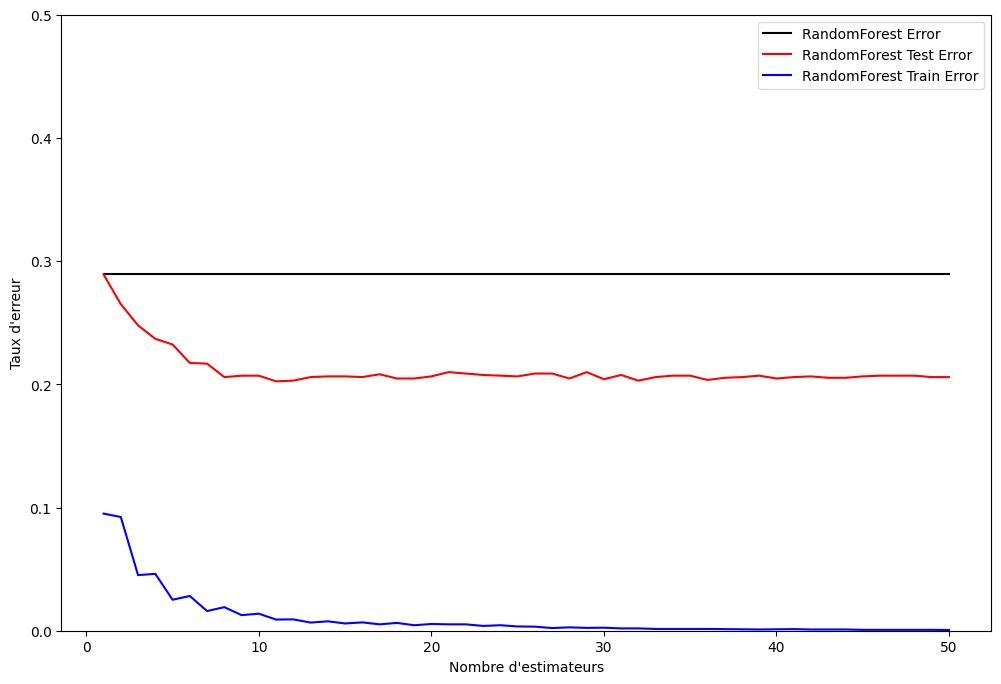

In [44]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.plot([1, max_n_estimators], [rf_err[0]] * 2, 'k-',
        label='RandomForest Error')

ax.plot(n_estimators_list, rf_err,
        label='RandomForest Test Error',
        color='red')

ax.plot(n_estimators_list, rf_err_train,
        label='RandomForest Train Error',
        color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('Nombre d\'estimateurs')
ax.set_ylabel('Taux d\'erreur')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

AUC de la courbe ROC: 0.8773423920376529


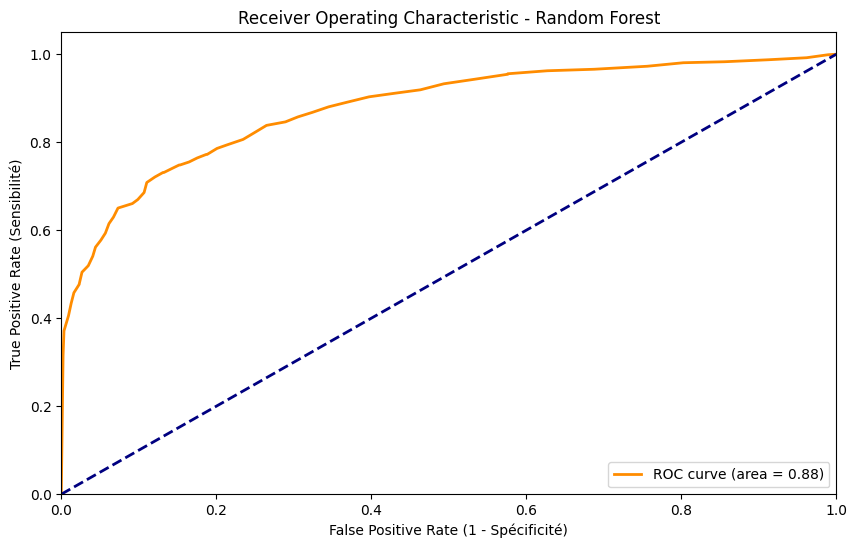

AUC de la courbe ROC pour le Random Forest: 0.88


In [57]:
# Faire des prédictions de probabilité
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculer les taux de vrais positifs (TPR) et de faux positifs (FPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("AUC de la courbe ROC:", roc_auc_rf)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Spécificité)')
plt.ylabel('True Positive Rate (Sensibilité)')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f'AUC de la courbe ROC pour le Random Forest: {roc_auc_rf:.2f}')

### Métriques

In [61]:
# Définir un seuil de classification (vous pouvez ajuster ce seuil selon vos besoins)
threshold_rf = 0.5569002783628485  # Utilisez le seuil que vous jugez optimal

# Convertir les probabilités en prédictions binaires basées sur le seuil
y_pred_rf = (y_pred_proba_rf >= threshold_rf).astype(int)

# Créer la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion :\n", conf_matrix_rf)

# Calculer le taux de bonne classification (accuracy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Taux de bonne classification :", accuracy_rf)

# Calculer la précision
precision_rf = precision_score(y_test, y_pred_rf)
print("Précision :", precision_rf)

# Calculer le rappel (sensibilité)
recall_rf = recall_score(y_test, y_pred_rf)
print("Rappel (sensibilité) :", recall_rf)

# Calculer la spécificité
rf_tn, rf_fp, rf_fn, rf_tp = conf_matrix_rf.ravel()
specificity_rf = rf_tn / (rf_tn + rf_fp)
print("Spécificité :", specificity_rf)

# Calculer le score F1
f1_rf = f1_score(y_test, y_pred_rf)
print("Score F1 :", f1_rf)

Matrice de confusion :
 [[730 131]
 [221 657]]
Taux de bonne classification : 0.7975848188614146
Précision : 0.833756345177665
Rappel (sensibilité) : 0.7482915717539863
Spécificité : 0.8478513356562137
Score F1 : 0.7887154861944778


### Validation croisée

In [49]:
# Appliquer la validation croisée k-fold (par exemple, k=5) avec plusieurs métriques
cv_results_rf = cross_validate(rf, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Afficher les résultats
print("Scores de validation croisée (accuracy) :", cv_results_rf['test_accuracy'])
print("Moyenne des scores de validation croisée (accuracy) :", cv_results_rf['test_accuracy'].mean())
print("Écart-type des scores de validation croisée (accuracy) :", cv_results_rf['test_accuracy'].std())

print("Scores de validation croisée (precision) :", cv_results_rf['test_precision'])
print("Moyenne des scores de validation croisée (precision) :", cv_results_rf['test_precision'].mean())
print("Écart-type des scores de validation croisée (precision) :", cv_results_rf['test_precision'].std())

print("Scores de validation croisée (recall) :", cv_results_rf['test_recall'])
print("Moyenne des scores de validation croisée (recall) :", cv_results_rf['test_recall'].mean())
print("Écart-type des scores de validation croisée (recall) :", cv_results_rf['test_recall'].std())

print("Scores de validation croisée (f1) :", cv_results_rf['test_f1'])
print("Moyenne des scores de validation croisée (f1) :", cv_results_rf['test_f1'].mean())
print("Écart-type des scores de validation croisée (f1) :", cv_results_rf['test_f1'].std())

Scores de validation croisée (accuracy) : [0.75675676 0.76423232 0.80103508 0.81127733 0.78365938]
Moyenne des scores de validation croisée (accuracy) : 0.7833921721344291
Écart-type des scores de validation croisée (accuracy) : 0.020810915128699963
Scores de validation croisée (precision) : [0.88717949 0.80417755 0.8045977  0.8221437  0.84413793]
Moyenne des scores de validation croisée (precision) : 0.8324472727048177
Écart-type des scores de validation croisée (precision) : 0.031026525866500267
Scores de validation croisée (recall) : [0.59246575 0.70319635 0.79908676 0.79771429 0.69942857]
Moyenne des scores de validation croisée (recall) : 0.718378343118069
Écart-type des scores de validation croisée (recall) : 0.0764873938821999
Scores de validation croisée (f1) : [0.71047228 0.75030451 0.80183276 0.80974478 0.765     ]
Moyenne des scores de validation croisée (f1) : 0.7674708652275883
Écart-type des scores de validation croisée (f1) : 0.03610388214714879


## SVM

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [51]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérifier les shapes pour s'assurer qu'elles correspondent
print("Shape de X_train_scaled:", X_train_scaled.shape)
print("Shape de X_test_scaled:", X_test_scaled.shape)


Shape de X_train_scaled: (6954, 21)
Shape de X_test_scaled: (1739, 21)


In [52]:
C = 1.0
kernel = 'rbf'  
gamma = 'scale'  # Paramètre pour le noyau RBF

# Entraîner le modèle SVM
svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [53]:
# Prédictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Évaluation des performances
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, y_pred_proba_svm)
svm_auc = auc(svm_fpr, svm_tpr)

print(f"Taux de bonne classification pour SVM: {svm_accuracy}")
print(f"AUC de la courbe ROC pour SVM: {svm_auc}")

Taux de bonne classification pour SVM: 0.7878090856814262
AUC de la courbe ROC pour SVM: 0.878128149976586


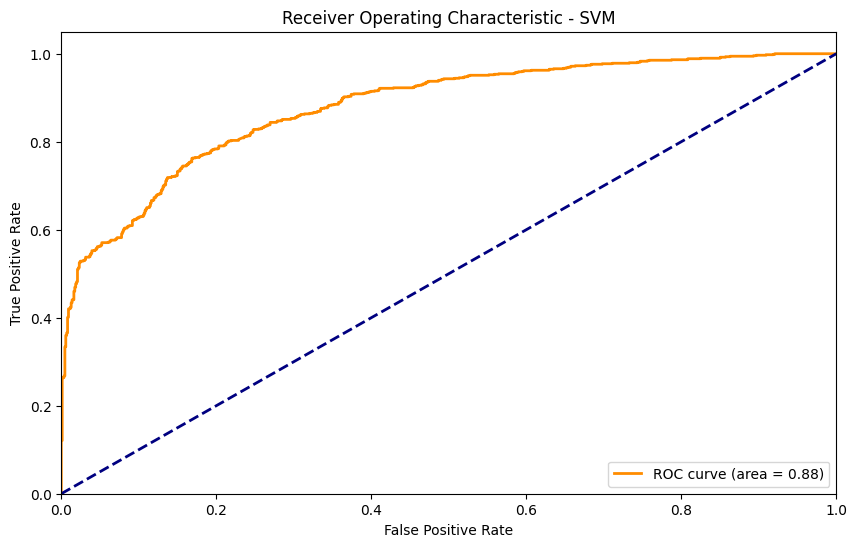

In [54]:
# Affichage de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

### Metriques

In [62]:
# Définir un seuil de classification (vous pouvez ajuster ce seuil selon vos besoins)
threshold_svm = 0.5569002783628485  # Utilisez le seuil que vous jugez optimal

# Convertir les probabilités en prédictions binaires basées sur le seuil
y_pred_svm_binary = (y_pred_proba_svm >= threshold_svm).astype(int)

# Créer la matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_binary)
print("Matrice de confusion :\n", conf_matrix_svm)

# Calculer le taux de bonne classification (accuracy)
accuracy_svm = accuracy_score(y_test, y_pred_svm_binary)
print("Taux de bonne classification :", accuracy_svm)

# Calculer la précision
precision_svm = precision_score(y_test, y_pred_svm_binary)
print("Précision :", precision_svm)

# Calculer le rappel (sensibilité)
recall_svm = recall_score(y_test, y_pred_svm_binary)
print("Rappel (sensibilité) :", recall_svm)

# Calculer la spécificité
svm_tn, svm_fp, svm_fn, svm_tp = conf_matrix_svm.ravel()
specificity_svm = svm_tn / (svm_tn + svm_fp)
print("Spécificité :", specificity_svm)

# Calculer le score F1
f1_svm = f1_score(y_test, y_pred_svm_binary)
print("Score F1 :", f1_svm)

Matrice de confusion :
 [[684 177]
 [184 694]]
Taux de bonne classification : 0.7924094307073031
Précision : 0.7967853042479908
Rappel (sensibilité) : 0.7904328018223234
Spécificité : 0.794425087108014
Score F1 : 0.793596340766152


### Validation croisée

In [56]:
# Appliquer la validation croisée k-fold (par exemple, k=5) avec plusieurs métriques
cv_results_svm = cross_validate(svm, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Afficher les résultats
print("Scores de validation croisée (accuracy) :", cv_results_svm['test_accuracy'])
print("Moyenne des scores de validation croisée (accuracy) :", cv_results_svm['test_accuracy'].mean())
print("Écart-type des scores de validation croisée (accuracy) :", cv_results_svm['test_accuracy'].std())

print("Scores de validation croisée (precision) :", cv_results_svm['test_precision'])
print("Moyenne des scores de validation croisée (precision) :", cv_results_svm['test_precision'].mean())
print("Écart-type des scores de validation croisée (precision) :", cv_results_svm['test_precision'].std())

print("Scores de validation croisée (recall) :", cv_results_svm['test_recall'])
print("Moyenne des scores de validation croisée (recall) :", cv_results_svm['test_recall'].mean())
print("Écart-type des scores de validation croisée (recall) :", cv_results_svm['test_recall'].std())

print("Scores de validation croisée (f1) :", cv_results_svm['test_f1'])
print("Moyenne des scores de validation croisée (f1) :", cv_results_svm['test_f1'].mean())
print("Écart-type des scores de validation croisée (f1) :", cv_results_svm['test_f1'].std())

Scores de validation croisée (accuracy) : [0.76480736 0.77055779 0.786659   0.8009206  0.79746835]
Moyenne des scores de validation croisée (accuracy) : 0.7840826209261437
Écart-type des scores de validation croisée (accuracy) : 0.014309365723918695
Scores de validation croisée (precision) : [0.71246588 0.722274   0.75897436 0.76582915 0.74462114]
Moyenne des scores de validation croisée (precision) : 0.7408329044327102
Écart-type des scores de validation croisée (precision) : 0.02057861208904382
Scores de validation croisée (recall) : [0.89383562 0.8847032  0.84474886 0.87085714 0.90971429]
Moyenne des scores de validation croisée (recall) : 0.8807718199608612
Écart-type des scores de validation croisée (recall) : 0.02199881542650977
Scores de validation croisée (f1) : [0.79291139 0.79527963 0.7995678  0.81497326 0.81893004]
Moyenne des scores de validation croisée (f1) : 0.8043324254715486
Écart-type des scores de validation croisée (f1) : 0.010596343921241742


### Courbe ROC des trois modeles

AUC de la courbe ROC Logistique: 0.8622370554977923
AUC de la courbe ROC Random Forest: 0.8773423920376529
AUC de la courbe ROC SVM: 0.878128149976586


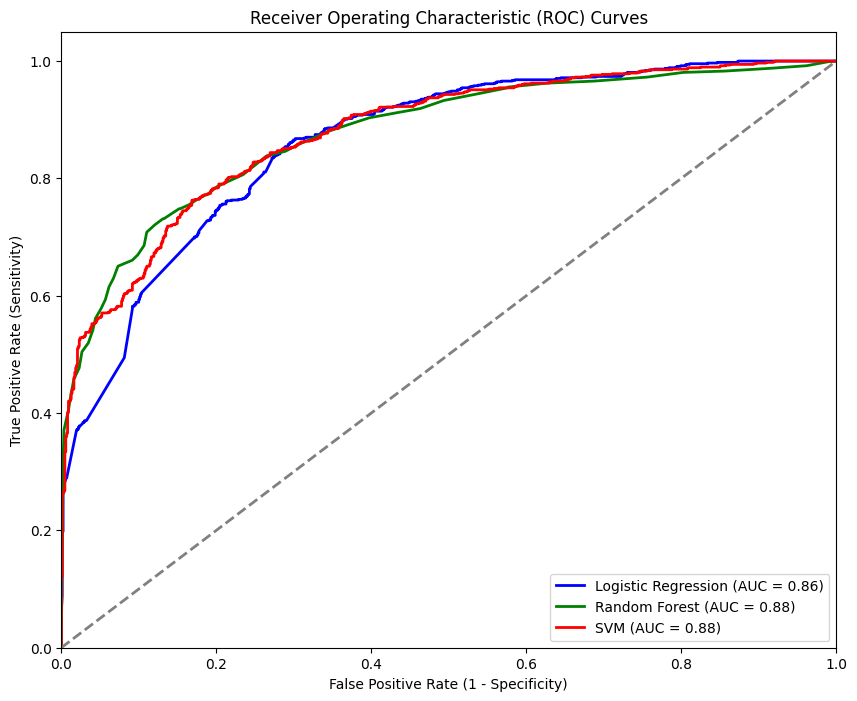

In [59]:
# Calcul des courbes ROC pour chaque modèle
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


print("AUC de la courbe ROC Logistique:", roc_auc_logistic)
print("AUC de la courbe ROC Random Forest:", roc_auc_rf)
print("AUC de la courbe ROC SVM:", roc_auc_svm)

# Création de la figure
plt.figure(figsize=(10, 8))

# Tracer les courbes ROC
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# Tracer la ligne diagonale pour la référence
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Ajouter des labels et une légende
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Afficher la figure
plt.show()

# Test du modèle du SVM sur le fichier Test

## Importation

In [61]:
df_test = pd.read_csv('../Données/test.csv')

## Traitement des données

In [62]:
df_test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [63]:
# Gestion des valeurs manquantes dans la colonne Cabin
df_test[["Deck", "Cabin_num", "Side"]] = df_test["Cabin"].str.split("/", expand=True)

try:
    df_test = df_test.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

# Conversion en catégories
categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
df_test[categorical_cols] = df_test[categorical_cols].astype('category')
df_test['Cabin_num'] = df_test['Cabin_num'].astype(float)

# Remplacement des valeurs manquantes dans Cabin_num par la valeur la plus courante
most_frequent_cabin_num = df_test['Cabin_num'].mode()[0]
df_test['Cabin_num'] = df_test['Cabin_num'].fillna(most_frequent_cabin_num)


# Remplacement des valeurs manquantes dans Age par la médiane
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

# Remplacement des valeurs manquantes dans les variables de dépenses par zéro
billed_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in billed_cols:
    df_test[col] = df_test[col].fillna(0)

# Remplacer les valeurs manquantes pour les colonnes catégorielles par le mode
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
for col in cat_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Convertir explicitement les colonnes en catégories après remplissage des valeurs manquantes
df_test[cat_cols] = df_test[cat_cols].astype('category')

# Encodage des variables catégorielles
df_test['VIP'] = df_test['VIP'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)



C:\Users\User\AppData\Local\Temp\ipykernel_10740\3838629778.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[col] = df_test[col].fillna(df_test[col].mode()[0])


In [64]:
df_test.isnull().sum().sort_values(ascending=False)

Name                         94
PassengerId                   0
HomePlanet_Mars               0
Deck_T                        0
Deck_G                        0
Deck_F                        0
Deck_E                        0
Deck_D                        0
Deck_C                        0
Deck_B                        0
Destination_TRAPPIST-1e       0
Destination_PSO J318.5-22     0
HomePlanet_Europa             0
CryoSleep                     0
Cabin_num                     0
VRDeck                        0
Spa                           0
ShoppingMall                  0
FoodCourt                     0
RoomService                   0
VIP                           0
Age                           0
Side_S                        0
dtype: int64

## Modelisation

In [66]:
# Sauvegarder PassengerId pour la soumission
submission_id = df_test.PassengerId

# Standardisation des données
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(df_test.drop(['PassengerId', 'Name'], axis=1))

svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)  

# Prédictions
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]
n_predictions = (y_pred_proba_svm > 0.5569022783628485).astype(bool)


## Soumission

In [67]:
# Création du fichier de soumission
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predictions})
output.to_csv('submission.csv', index=False)
print(output.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False


In [68]:
print(output.shape)

(4277, 2)
